#### Summary statistics
Median vs mean: When data is skewed or there are many outliers it is better to use median since it is less affected by these situations. When data is symmetrical mean is better. <br></br>
Variance: measures the avg distance from each data point to the mean. Higher the variance the more spread out the data is <br></br>
<b>np.var(df["col1"], ddof=1)</b> Calculate the variance. ddof is needed when used on a sample dataset. Without ddof population variance is calculated instead of sample variance <br></br>
Standard deviation: Takes the square root of the variance. Another calculation of spread just like variance but sd uses the same units as the original values (e.g., minutes or meters) <br></br>
<b>np.std(df["col1"], ddof=1)</b> Calculate the sd.  <br></br>
Mean absolute deviation: Takes the absolute value of the distance to the mean and then takes the mean of those differences. <br></br>
Differences between SD and MAD: SD penalizes bigger values than shorter ones while MAD penalizes all values equally. SD is more common. <br></br>
Quantiles: Split up the data into some number of equal parts <br></br>
<b>np.quantiles(df["col1"], 0.5)</b> Splits up the data into values above 50% and below and returns the value that achieves this split. 0.5 quantile = median <br></br>
<b>np.quantile(df["col1"], np.linspace(0, 1, 5))</b> Same as above but will return many values for each quartile given. linspace starts at one ends at 1 and splits into 5 different intervals <br></br>
<b>from scipy.stats import iqr</b> Used below <br></br>
<b>iqr(df["col1"])</b> Calculate interquartile range(IQR) or height of box plot. <br></br>
Outliers: data < Q1 -1.5 * IQR or data > Q3 + 1.5 * IQR is considered an outlier <br></br>


In [8]:
# Import numpy with alias np
import numpy as np
import pandas as pd

food_consumption = pd.read_csv("food_consumption.csv")

# Filter for Belgium
be_consumption = food_consumption[food_consumption['country'] == 'Belgium']

# Filter for USA
usa_consumption = food_consumption[food_consumption['country'] == 'USA']

# Calculate mean and median consumption in Belgium
print(np.mean(be_consumption['consumption']))
print(np.median(be_consumption['consumption']))

# Calculate mean and median consumption in USA
print(np.mean(usa_consumption['consumption']))
print(np.median(usa_consumption['consumption']))

42.132727272727266
12.59
44.650000000000006
14.58


In [3]:
# Import numpy as np
import numpy as np

# Subset for Belgium and USA only
be_and_usa = food_consumption[(food_consumption['country'] == "Belgium") | (food_consumption['country'] == 'USA')]

# Group by country, select consumption column, and compute mean and median
print(be_and_usa.groupby('country')['consumption'].agg([np.mean, np.median]))

              mean  median
country                   
Belgium  42.132727   12.59
USA      44.650000   14.58


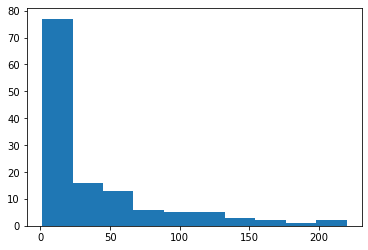

In [4]:
# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Subset for food_category equals rice
rice_consumption = food_consumption[food_consumption["food_category"] == "rice"]

# Histogram of co2_emission for rice and show plot
plt.hist(rice_consumption["co2_emission"])
plt.show()

In [5]:
# Subset for food_category equals rice
rice_consumption = food_consumption[food_consumption['food_category'] == 'rice']

# Calculate mean and median of co2_emission with .agg()
print(rice_consumption["co2_emission"].agg([np.mean, np.median]))

mean      37.591615
median    15.200000
Name: co2_emission, dtype: float64


The mean is substantially higher than the median since it's being pulled up by the high values over 100 kg/person/year.

In [7]:
# Calculate the quintiles of co2_emission into 5 pieces(quintiles)
print(np.quantile(food_consumption["co2_emission"], np.linspace(0, 1, 6)))

# Calculate the deciles of co2_emission
print(np.quantile(food_consumption["co2_emission"], np.linspace(0, 1, 11)))

[   0.       3.54    11.026   25.59    99.978 1712.   ]
[0.00000e+00 6.68000e-01 3.54000e+00 7.04000e+00 1.10260e+01 1.65300e+01
 2.55900e+01 4.42710e+01 9.99780e+01 2.03629e+02 1.71200e+03]


                        var         std
food_category                          
beef           88748.408132  297.906710
dairy          17671.891985  132.935669
eggs              21.371819    4.622966
fish             921.637349   30.358481
lamb_goat      16475.518363  128.356996
nuts              35.639652    5.969895
pork            3094.963537   55.632396
poultry          245.026801   15.653332
rice            2281.376243   47.763754
soybeans           0.879882    0.938020
wheat             71.023937    8.427570


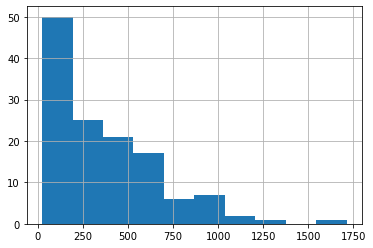

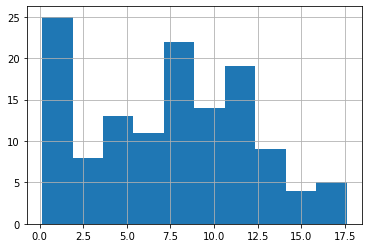

In [9]:
# Print variance and sd of co2_emission for each food_category
print(food_consumption.groupby('food_category')['co2_emission'].agg([np.var, np.std]))

# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Create histogram of co2_emission for food_category 'beef'
food_consumption[food_consumption['food_category'] == 'beef']['co2_emission'].hist()
# Show plot
plt.show()

# Create histogram of co2_emission for food_category 'eggs'
food_consumption[food_consumption['food_category'] == 'eggs']['co2_emission'].hist()
# Show plot
plt.show()

In [10]:
# Calculate total co2_emission per country: emissions_by_country
emissions_by_country = food_consumption.groupby('country')['co2_emission'].sum()

# Compute the first and third quantiles and IQR of emissions_by_country
q1 = np.quantile(emissions_by_country, 0.25)
q3 = np.quantile(emissions_by_country, 0.75)
iqr = q3 - q1

# Calculate the lower and upper cutoffs for outliers
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

# Subset emissions_by_country to find outliers
outliers = emissions_by_country[(emissions_by_country < lower) | (emissions_by_country > upper)]
print(outliers)

country
Argentina    2172.4
Name: co2_emission, dtype: float64


#### Random Numbers and Probability
<b>df.sample(3, replace=True)</b> By default selects 3 random rows from df, and without replacement <br></br> 
<b>np.random.seed(10)</b> Setting a seed. If oriented with a seed number, df.sample() will generate the same random value each time <br></br>
Discrete uniform distribution: When all outcomes have the same probability like a fair die <br></br>
Continuous uniform distribution: Same as above but continuous <br></br>
<b>from scipy.stats import uniform</b> Used below <br></br>
<b>uniform.cdf(7, 0, 12)</b> Values lower or equal to 7, lower and upper limit(0 and 12) <br></br>
<b>uniform.rvs(0, 5, size=10)</b> Generate 10 random numbers from 0 to 5 according to uniform distribution <br></br>
<b>from scipy.stats import binom</b> Binomial distribution is a probability distribution of the number of successes in a sequence of independent trials. Binary probability <br></br>
<b>binom.rvs(# of trials, prob of success, size=# of trials)</b> If # of coins = 8 with a size of 1, a single value will be returned which is the total number of heads/successes. If prob of head/success is 0.25 you have a 25% chance of getting head rather than 50% <br></br>
<b>binon.pmf(num heads, num trials, prob of heads)</b> With 10 trials, to get the number of heads to be 7 with a fair coin it would return about 12% <br></br>
<b>binom.cdf(7, 10, 0.5)</b> would return about 95% for the probability of getting 7 or less heads in 10 flips with a fair coin <br></br>
Expected value of a binomial distribution can be calculated by n * p with n being number of trials and p being the success rate <br></br>

In [8]:
# Set random seed
np.random.seed(24)

# Sample 5 deals with replacement
sample_with_replacement = food_consumption.sample(5, replace=True)
print(sample_with_replacement)

      Unnamed: 0     country food_category  consumption  co2_emission
418          419      Russia          pork        25.66         90.82
899          900       Niger          rice        13.17         16.85
192          193      Canada          eggs        12.95         11.90
343          344       Malta          beef        19.22        593.09
1425        1426  Bangladesh         dairy        21.91         31.21


In [ ]:
# Create a histogram of restaurant_groups and show plot
restaurant_groups["group_size"].hist(bins=[2, 3, 4, 5, 6])
plt.show()

In [10]:
# Min and max wait times for back-up that happens every 30 min
min_time = 0
max_time = 30

# Import uniform from scipy.stats
from scipy.stats import uniform

# Calculate probability of waiting 10-20 mins
prob_between_10_and_20 = uniform.cdf(20, min_time, max_time) - uniform.cdf(10, min_time, max_time)
print(prob_between_10_and_20)

0.3333333333333333


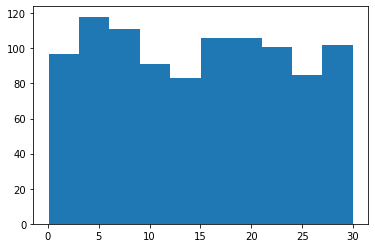

In [9]:
# Set random seed to 334
np.random.seed(334)

# Import uniform
from scipy.stats import uniform

# Generate 1000 wait times between 0 and 30 mins
wait_times = uniform.rvs(0, 30, size=1000)

# Create a histogram of simulated times and show plot
plt.hist(wait_times)
plt.show()

In [6]:
# simulate 1 deal worked on by Amir, who wins 30% of the deals he works on.
# Import binom from scipy.stats
from scipy.stats import binom
import numpy as np

# Set random seed to 10
np.random.seed(10)

# Simulate a single deal
print(binom.rvs(1, 0.30, size=1))

# Simulate 52 weeks of 3 deals
deals = binom.rvs(3, 0.3, size=52)

# Print mean deals won per week
print(np.mean(deals))

[1]
0.8461538461538461


#### More Distributions and the Central Limit Theorem
<b>from scipy.stats import norm</b> Used below <br></br>
<b>norm.cdf(Num of interest, mean, sd)</b> What percentage of the dataset is below num of interest with a mean of _ and a sd of _ <br></br> 
<b>norm.ppf(percent of dataset, mean, sd)</b> What number does 90 percent of the data fall below witha mean of _ and a sd of _ <br></br>
<b>norm.rvs(161, 7, size=10)</b> Generate random values based on norm distribution with a size of 10, mean of 161 and sd of 7. <br></br>
<b>Central limit theorm</b> The sampling distribution of a statistic becomes closer to the normal distribution as the number of trials increases. <br></br>
<b>Sampling distribution</b> More easily estimate chracteristics of large populations <br></br>
<b>from scipy.stats import expon</b> For exponential distributions. Same as poisson but continous <br></br>
<b>expon.cdf(1, scale=0.5)</b> Probability of 1 or less with a frequency of 0.5 which means 0.5 hits per unit. <br></br>
Poisson process: Events appear to happen at a certain rate but completely at random. Use when average number is known <br></br>
<b>from scipy.stats import poisson</b> Used below <br></br>
<b>poisson.pmf(5, 8)</b> Chance of getting 5 with a mean of 8 <br></br>
<b>poisson.cdf</b> Chance of getting 5 or less with a mean of 8 <br></br>
<b>poisson.rvs(8, size=10)</b> Sampling <br></br>




In [2]:
from scipy.stats import norm 

# Probability of deal < 7500
prob_less_7500 = norm.cdf(7500, 5000, 2000)

print(prob_less_7500)

# Probability of deal > 1000
prob_over_1000 = 1 - norm.cdf(1000, 5000, 2000)

print(prob_over_1000)

# Calculate amount that 25% of deals will be less than
pct_25 = norm.ppf(0.25, 5000, 2000)

print(pct_25)

0.8943502263331446
0.9772498680518208
3651.0204996078364


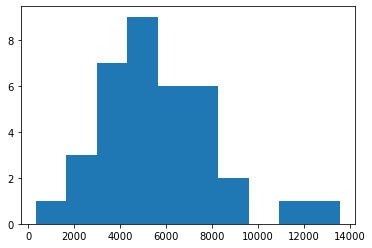

In [4]:
import matplotlib.pyplot as plt

# Calculate new average amount
new_mean = 5000 * 1.2

# Calculate new standard deviation
new_sd = 2000 * 1.3

# Simulate 36 new sales
new_sales = norm.rvs(new_mean, new_sd, size=36)

# Create histogram and show
plt.hist(new_sales)
plt.show()


In [11]:
amir_deals = pd.read_csv("amir_deals.csv")

# Set seed to 104
np.random.seed(104)

# Sample 20 num_users with replacement from amir_deals
samp_20 = amir_deals['num_users'].sample(20, replace=True)

# Take mean of samp_20
print(np.mean(samp_20))

32.0


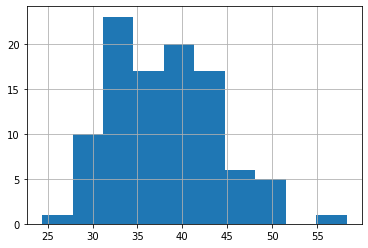

In [12]:
np.random.seed(104)

sample_means = []
# Loop 100 times
for i in range(100):
  # Take sample of 20 num_users
  samp_20 = amir_deals['num_users'].sample(20, replace=True)
  # Calculate mean of samp_20
  samp_20_mean = np.mean(samp_20)
  # Append samp_20_mean to sample_means
  sample_means.append(samp_20_mean)
  
# Convert to Series and plot histogram
sample_means_series = pd.Series(sample_means)
sample_means_series.hist()
# Show plot
plt.show()

In [ ]:
# Set seed to 321
np.random.seed(321)

sample_means = []
# Loop 30 times to take 30 means
for i in range(30):
  # Take sample of size 20 from num_users col of all_deals with replacement
  cur_sample = all_deals["num_users"].sample(20, replace=True)
  # Take mean of cur_sample
  cur_mean = np.mean(cur_sample)
  # Append cur_mean to sample_means
  sample_means.append(cur_mean)

# Print mean of sample_means
print(np.mean(sample_means))

# Print mean of num_users in amir_deals
print(np.mean(amir_deals["num_users"]))

#### Correlation and Experimental Design
When data is highly skewed we can apply a log transformation <br></br> 
Other transformations are square root and reciprocal(1/x). Using them depends on the data and how skewed it is <br></br>
<b>df["new_col"] = np.log(df["col1"])</b> Take log of col1 <br></br>
<b>df["col1"].corr(df["col2"])</b> Find correlation between the two columns. Only works on linear relationships <br></br>



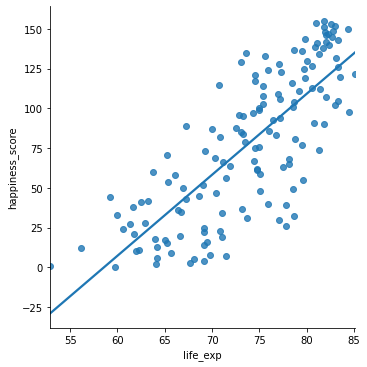

0.7802249053272061


In [13]:
import seaborn as sns

world_happiness = pd.read_csv("world_happiness.csv")

# Create scatterplot of happiness_score vs life_exp with trendline
sns.lmplot(x='life_exp', y='happiness_score', data=world_happiness, ci=None)

# Show plot
plt.show()

# Correlation between life_exp and happiness_score
cor = world_happiness["life_exp"].corr(world_happiness["happiness_score"])

print(cor)

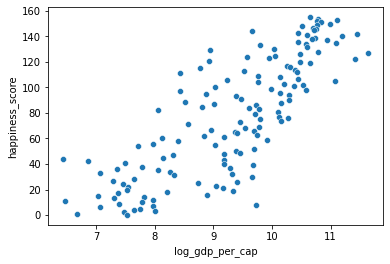

0.8043146004918288


In [14]:
# Create log_gdp_per_cap column
world_happiness['log_gdp_per_cap'] = np.log(world_happiness['gdp_per_cap'])

# Scatterplot of log_gdp_per_cap and happiness_score
sns.scatterplot(x='log_gdp_per_cap', y='happiness_score', data=world_happiness)
plt.show()

# Calculate correlation
cor = world_happiness['log_gdp_per_cap'].corr(world_happiness['happiness_score'])
print(cor)